<a href="https://colab.research.google.com/github/RENISA-GRACELIN/Online_Internship_Projects/blob/main/R_SVM_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/DR_50/Train'
test_dir = '/content/drive/MyDrive/DR_50/Test'
valid_dir = '/content/drive/MyDrive/DR_50/Valid'

Mounted at /content/drive


In [3]:
# Image dimensions
img_width, img_height = 300, 300  # Adjust according to your image dimensions
batch_size = 32
num_epochs = 20

In [4]:
# Load VGG19 model for feature extraction
model = VGG19(weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 1s 0us/step


In [5]:
# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

In [6]:
# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)


1/1 [==============================] - 1s 1s/step


In [7]:
from tqdm import tqdm

# Evaluate on test set
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    # Use tqdm to create a progress bar
    for img_path in tqdm(os.listdir(class_dir), desc=f'Class {i}'):
        features = extract_features(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

#y_pred = clf.predict(x_test)


Class 0:   0%|          | 0/5 [00:00<?, ?it/s]

1/1 [==============================] - 1s 621ms/step


Class 0:  20%|██        | 1/5 [00:00<00:03,  1.00it/s]

1/1 [==============================] - 1s 630ms/step


Class 0:  40%|████      | 2/5 [00:02<00:03,  1.00s/it]

1/1 [==============================] - 1s 626ms/step


Class 0:  60%|██████    | 3/5 [00:03<00:02,  1.05s/it]

1/1 [==============================] - 1s 618ms/step


Class 0:  80%|████████  | 4/5 [00:04<00:01,  1.02s/it]

1/1 [==============================] - 1s 629ms/step


Class 1:   0%|          | 0/5 [00:00<?, ?it/s]

1/1 [==============================] - 1s 624ms/step


Class 1:  20%|██        | 1/5 [00:01<00:04,  1.06s/it]

1/1 [==============================] - 1s 625ms/step


Class 1:  40%|████      | 2/5 [00:02<00:03,  1.01s/it]

1/1 [==============================] - 1s 627ms/step


Class 1:  60%|██████    | 3/5 [00:03<00:02,  1.13s/it]

1/1 [==============================] - 1s 615ms/step


Class 1:  80%|████████  | 4/5 [00:04<00:01,  1.13s/it]

1/1 [==============================] - 1s 1s/step


Class 2:   0%|          | 0/5 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


Class 2:  20%|██        | 1/5 [00:01<00:05,  1.44s/it]

1/1 [==============================] - 1s 630ms/step


Class 2:  40%|████      | 2/5 [00:02<00:03,  1.33s/it]

1/1 [==============================] - 1s 618ms/step


Class 2:  60%|██████    | 3/5 [00:03<00:02,  1.18s/it]

1/1 [==============================] - 1s 616ms/step


Class 2:  80%|████████  | 4/5 [00:04<00:01,  1.13s/it]

1/1 [==============================] - 1s 630ms/step


Class 3:   0%|          | 0/5 [00:00<?, ?it/s]

1/1 [==============================] - 1s 623ms/step


Class 3:  20%|██        | 1/5 [00:01<00:04,  1.03s/it]

1/1 [==============================] - 1s 622ms/step


Class 3:  40%|████      | 2/5 [00:02<00:03,  1.01s/it]

1/1 [==============================] - 1s 622ms/step


Class 3:  60%|██████    | 3/5 [00:03<00:02,  1.02s/it]

1/1 [==============================] - 1s 623ms/step


Class 3:  80%|████████  | 4/5 [00:04<00:01,  1.02s/it]

1/1 [==============================] - 1s 627ms/step


Class 4:   0%|          | 0/5 [00:00<?, ?it/s]

1/1 [==============================] - 1s 665ms/step


Class 4:  20%|██        | 1/5 [00:01<00:04,  1.02s/it]

1/1 [==============================] - 1s 1s/step


Class 4:  40%|████      | 2/5 [00:02<00:04,  1.45s/it]

1/1 [==============================] - 1s 1s/step


Class 4:  60%|██████    | 3/5 [00:04<00:02,  1.44s/it]

1/1 [==============================] - 1s 614ms/step


Class 4:  80%|████████  | 4/5 [00:05<00:01,  1.27s/it]

1/1 [==============================] - 1s 601ms/step


Class 4: 100%|██████████| 5/5 [00:06<00:00,  1.28s/it]


In [8]:
# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# List of kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print(f"Training SVM with {kernel} kernel...")

    # Train SVM classifier
    clf = svm.SVC(kernel=kernel)
    clf.fit(x_train_flat, y_train)

    # Predict on test set
    y_pred = clf.predict(x_test_flat)


    # Predict on test set
    y_pred = clf.predict(x_test_flat)

    # Print performance metrics
    print(f'Performance metrics for {kernel} kernel:')
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred))

    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    sensitivity = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')

    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}\n')


Training SVM with linear kernel...
Performance metrics for linear kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5
           3       0.50      0.40      0.44         5
           4       0.83      1.00      0.91         5

    accuracy                           0.72        25
   macro avg       0.73      0.72      0.71        25
weighted avg       0.73      0.72      0.71        25

Accuracy: 0.72
Sensitivity: 0.72
Precision: 0.7295238095238096
F1 Score: 0.7073737373737374

Training SVM with poly kernel...
Performance metrics for poly kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.40      0.57         5
           2       0.50      0.40      0.44         5
           

In [9]:
# Print performance metrics
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       1.00      0.60      0.75         5
           2       0.50      0.40      0.44         5
           3       0.17      0.20      0.18         5
           4       0.71      1.00      0.83         5

    accuracy                           0.52        25
   macro avg       0.56      0.52      0.52        25
weighted avg       0.56      0.52      0.52        25

Confusion Matrix:
[[2 0 0 3 0]
 [1 3 0 1 0]
 [1 0 2 1 1]
 [1 0 2 1 1]
 [0 0 0 0 5]]


Training SVM with linear kernel...
Performance metrics for linear kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5
           3       0.50      0.40      0.44         5
           4       0.83      1.00      0.91         5

    accuracy                           0.72        25
   macro avg       0.73      0.72      0.71        25
weighted avg       0.73      0.72      0.71        25

Accuracy: 0.72
Sensitivity: 0.72
Precision: 0.7295238095238096
F1 Score: 0.7073737373737374



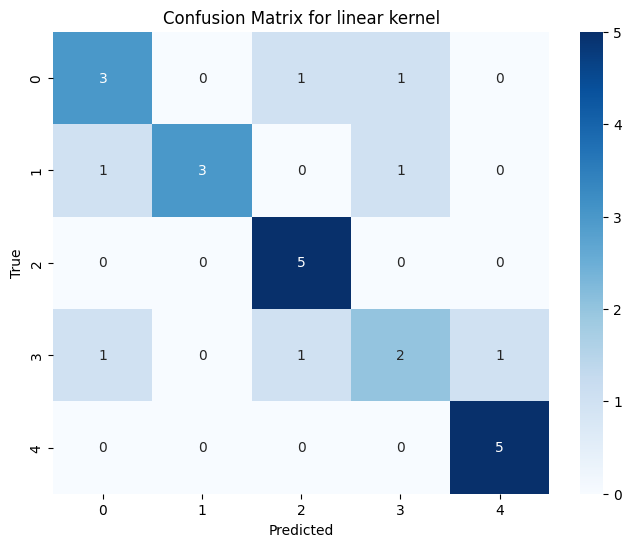

Training SVM with poly kernel...
Performance metrics for poly kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.40      0.57         5
           2       0.50      0.40      0.44         5
           3       1.00      0.20      0.33         5
           4       1.00      0.80      0.89         5

    accuracy                           0.56        25
   macro avg       0.77      0.56      0.55        25
weighted avg       0.77      0.56      0.55        25

Accuracy: 0.56
Sensitivity: 0.5599999999999999
Precision: 0.7714285714285715
F1 Score: 0.5528822055137844



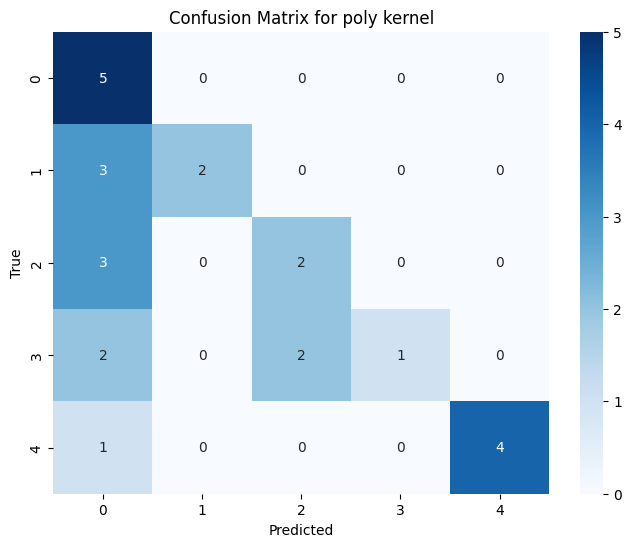

Training SVM with rbf kernel...
Performance metrics for rbf kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       1.00      0.60      0.75         5
           2       0.50      0.40      0.44         5
           3       0.20      0.20      0.20         5
           4       0.71      1.00      0.83         5

    accuracy                           0.56        25
   macro avg       0.58      0.56      0.55        25
weighted avg       0.58      0.56      0.55        25

Accuracy: 0.56
Sensitivity: 0.5599999999999999
Precision: 0.582857142857143
F1 Score: 0.5546464646464646



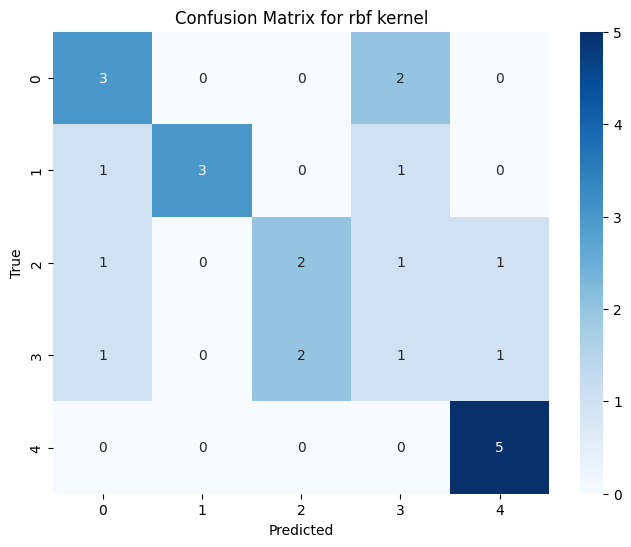

Training SVM with sigmoid kernel...
Performance metrics for sigmoid kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       1.00      0.60      0.75         5
           2       0.50      0.40      0.44         5
           3       0.17      0.20      0.18         5
           4       0.71      1.00      0.83         5

    accuracy                           0.52        25
   macro avg       0.56      0.52      0.52        25
weighted avg       0.56      0.52      0.52        25

Accuracy: 0.52
Sensitivity: 0.5199999999999999
Precision: 0.5561904761904761
F1 Score: 0.5219191919191919



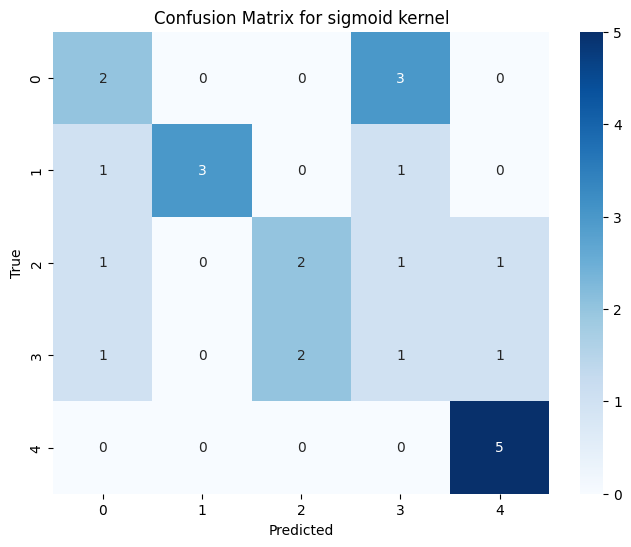

In [12]:
# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# List of kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print(f"Training SVM with {kernel} kernel...")

    # Train SVM classifier
    clf = svm.SVC(kernel=kernel)
    clf.fit(x_train_flat, y_train)

    # Predict on test set
    y_pred = clf.predict(x_test_flat)


    # Predict on test set
    y_pred = clf.predict(x_test_flat)

    # Print performance metrics
    print(f'Performance metrics for {kernel} kernel:')
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred))

    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    sensitivity = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')

    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}\n')

    import seaborn as sns
    import matplotlib.pyplot as plt

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {kernel} kernel')
    plt.show()

